In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("spam.csv",encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df[['Unnamed: 2','Unnamed: 3',"Unnamed: 4"]]

,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
5567,NaN,NaN,NaN
5568,NaN,NaN,NaN
5569,NaN,NaN,NaN
5570,NaN,NaN,NaN


In [6]:
df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']].isnull().count()

Unnamed: 2    5572
Unnamed: 3    5572
Unnamed: 4    5572
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.nunique()

v1       2
v2    5169
dtype: int64

In [12]:
df.columns=['label','message']

In [13]:
df['label']=df['label'].map({'ham':0,'spam':1})
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [15]:
df['message']=df['message'].str.lower()
df

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


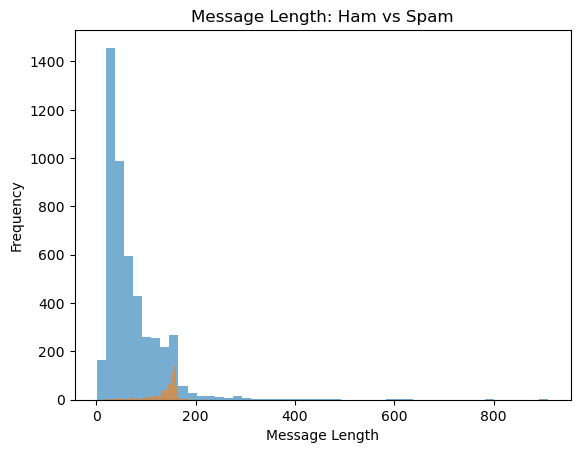

In [16]:
df['message_length'] = df['message'].apply(len)
plt.hist(df[df['label'] == 0]['message_length'], bins=50, alpha=0.6)
plt.hist(df[df['label'] == 1]['message_length'], bins=50, alpha=0.6)
plt.title("Message Length: Ham vs Spam")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()


C:\Users\abc\AppData\Local\Temp\ipykernel_9236\2358249826.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


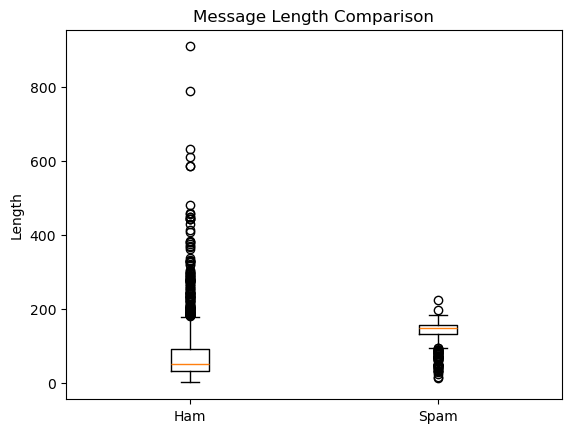

In [17]:
plt.boxplot(
    [df[df['label']==0]['message_length'], df[df['label']==1]['message_length']],
    labels=['Ham', 'Spam']
)
plt.title("Message Length Comparison")
plt.ylabel("Length")
plt.show()


In [18]:
df=df.drop(columns=['message_length'])

In [19]:
x=df['message']
y=df['label']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

In [22]:
tfidf

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word or character n-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21 Since v0.21, if ``input`` is ``'filename'`` or ``'file'``, the data is first read from the file and then passed to the given callable analyzer.",'word'
,"stop_words stop_words: {'english'}, list, default=NoneIf a string, it is passed to _check_stop_list and the appropriate stoplist is returned. 'english' is currently the only supported stringvalue.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",'english'
,"token_pattern token_pattern: str, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp selects tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentn-grams to be extracted. All values of n such that min_n <= n <= max_nwill be used. For example an ``ngram_range`` of ``(1, 1)`` means onlyunigrams, ``(1, 2)`` means unigrams and bigrams, and ``(2, 2)`` meansonly bigrams.Only applies if ``analyzer`` is not callable.

In [23]:
X_tfidf = tfidf.fit_transform(x)
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37082 stored elements and shape (5572, 3000)>
  Coords	Values
  (0, 2030)	0.3427615938187783
  (0, 741)	0.33937682868048286
  (0, 362)	0.32777968135451047
  (0, 546)	0.37021614048454177
  (0, 1227)	0.24207696703883225
  (0, 2934)	0.29642665139407415
  (0, 1484)	0.37021614048454177
  (0, 652)	0.37021614048454177
  (0, 1218)	0.2056563631231204
  (0, 2864)	0.24485466934992717
  (1, 1864)	0.27211951321382544
  (1, 1493)	0.4082988561907181
  (1, 1442)	0.5236458071582338
  (1, 2898)	0.4316010362639011
  (1, 1873)	0.5465881710238072
  (2, 1136)	0.12012277057177304
  (2, 982)	0.3748963824706373
  (2, 2916)	0.1984344330716511
  (2, 693)	0.20253932152816315
  (2, 2902)	0.1542463283365516
  (2, 1046)	0.4892032359505505
  (2, 755)	0.21308761157808154
  (2, 1095)	0.19165355364677925
  (2, 2687)	0.2299484394688448
  (2, 93)	0.23634937579200746
  :	:
  (5567, 2726)	0.2781288146228813
  (5567, 2679)	0.18335301354997333
  (5567, 713)	0.23104

In [24]:
X_tfidf.shape

(5572, 3000)

In [25]:
tfidf.get_feature_names_out()[:20]

array(['00', '000', '008704050406', '01223585334', '02', '0207', '03',
       '04', '05', '050703', '0578', '06', '07', '07123456789',
       '07734396839', '07742676969', '07xxxxxxxxx', '08', '0800',
       '08000407165'], dtype=object)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X_tfidf,y,test_size=0.2,random_state=42,stratify=y)

In [28]:
print(y_train.value_counts())
print(y_test.value_counts())

label
0    3859
1     598
Name: count, dtype: int64
label
0    966
1    149
Name: count, dtype: int64


In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
model=MultinomialNB()

In [31]:
model.fit(x_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [32]:
y_pred = model.predict(x_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1115,))

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9748878923766816


In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[965   1]
 [ 27 122]]


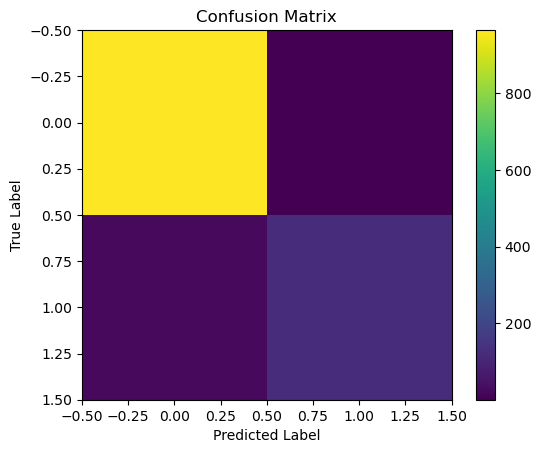

In [37]:
import matplotlib.pyplot as plt

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.82      0.90       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [39]:
import joblib

In [42]:
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [43]:
joblib.dump(model, "spam_classifier_model.pkl")

['spam_classifier_model.pkl']

In [45]:
loaded_model = joblib.load("spam_classifier_model.pkl")
loaded_tfidf = joblib.load("tfidf_vectorizer.pkl")

test_email = ["Are you ready for tomorrow's report and presentation"]
test_vector = loaded_tfidf.transform(test_email)
prediction = loaded_model.predict(test_vector)

print("Spam" if prediction[0] == 1 else "Ham")

Ham
